# Exploratory Data Anlaysis - Analysis
1. Intro, Libraries, & Data.
2. Develop Metrics for analyzing artists.
3. Creating Metric Distributions for each artist
4. Comparing Metric Distributions between artists.
5. Analyzing Metric-Distribution-Artist-Differences through Unsupervised Clustering.


# 1. Intro, Libraries, & Data.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# CV Libraries
import cv2
import skimage

In [3]:
import os
os.chdir('..')
from helpers.SetDataLocation import PathDir
path_dir = PathDir()


path_to_dataset = "C:/Users/Charl/Documents/FinalProject"
# USE FORWARD SLASHES IF WINDOWS ///
path_dir.create_file(path_to_dataset)
path_dir.get_path_and_chdir()
os.chdir(os.getcwd() + '\\' + 'resized' + '\\' + 'resized' )

.artistdata already created. If need to change path, do so manually.


In [4]:
os.listdir()[:5] # Checking If we are in correct directory. Should be paintings.

['Albrecht_10.jpg',
 'Albrecht_100.jpg',
 'Albrecht_101.jpg',
 'Albrecht_102.jpg',
 'Albrecht_103.jpg']

In [5]:
unique_artists = ['Amedeo Modigliani',
                  'Vasiliy Kandinskiy',
                  'Diego Rivera',
                  'Claude Monet',
                  'Rene Magritte',
                  'Salvador Dali',
                  'Edouard Manet',
                  'Andrei Rublev',
                  'Vincent van Gogh',
                  'Gustav Klimt',
                  'Hieronymus Bosch',
                  'Kazimir Malevich',
                  'Mikhail Vrubel',
                  'Pablo Picasso',
                  'Peter Paul Rubens',
                  'Pierre-Auguste Renoir',
                  'Francisco Goya',
                  'Frida Kahlo',
                  'El Greco',
                  'Albrecht Dürer',
                  'Alfred Sisley',
                  'Pieter Bruegel',
                  'Marc Chagall',
                  'Giotto di Bondone',
                  'Sandro Botticelli',
                  'Caravaggio',
                  'Leonardo da Vinci',
                  'Diego Velazquez',
                  'Henri Matisse',
                  'Jan van Eyck',
                  'Edgar Degas',
                  'Rembrandt',
                  'Titian',
                  'Henri de Toulouse-Lautrec',
                  'Gustave Courbet',
                  'Camille Pissarro',
                  'William Turner',
                  'Edvard Munch',
                  'Paul Cezanne',
                  'Eugene Delacroix',
                  'Henri Rousseau',
                  'Georges Seurat',
                  'Paul Klee',
                  'Piet Mondrian',
                  'Joan Miro',
                  'Andy Warhol',
                  'Paul Gauguin',
                  'Raphael',
                  'Michelangelo',
                  'Jackson Pollock']

In [6]:
unique_artists.sort()

# Creating Dictionary for artist and their associated pictures
for i in range(len(unique_artists)):
    unique_artists[i] = unique_artists[i].replace(" ", "_")

unique_artists[0] = "Albrecht" # Chaning this one to match name in resized

cur_index = 0
dataset = []

for pic_name in os.listdir():
    for artist in unique_artists:
        if artist in pic_name:
            observation = dict()
            observation["artist-name"] = artist
            observation["pic-file-name"] = pic_name
            dataset.append(observation)
            

artists = dataset


In [7]:
len(os.listdir())

8354

In [8]:
### Artists to Analyze Simply
edgar_img_path = os.getcwd() + "\\" + os.listdir()[2000]
random_img_path = os.getcwd() + "\\" + os.listdir()[1000]
img_path = os.getcwd() + "\\" + os.listdir()[8000]
img_path_2 = os.getcwd() + "\\" + os.listdir()[7999]

albrecht_path = os.getcwd() + "\\" + os.listdir()[0]

In [9]:
print(img_path)
print(albrecht_path)

C:\Users\Charl\Documents\FinalProject\resized\resized\Vincent_van_Gogh_63.jpg
C:\Users\Charl\Documents\FinalProject\resized\resized\Albrecht_10.jpg


In [10]:
def get_average_hsv(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Calculate the average HSV values
    h_avg, s_avg, v_avg = cv2.mean(hsv)[:3]

    return (h_avg, s_avg, v_avg)


In [11]:
get_average_hsv(img_path)

(78.41463120081507, 66.55165076939292, 150.28121267214726)

In [12]:
get_average_hsv(albrecht_path)

(0.0, 0.0, 159.6709351025805)

# 2. Develop Metrics for analyzing artists.
* HSV Color Distributions 
* Dynamic Ranges of brightness values
* Edge Detection
* Symmetry and balance
* Geometric analysis

### Analyzing Color - HSV

In [22]:
def get_average_hsv(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Calculate the avera|ge HSV values
    h_avg, s_avg, v_avg = cv2.mean(hsv)[:3]

    return (h_avg, s_avg, v_avg)

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors


def plot_hsv_distribution(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Get the HSV values for each pixel
    h, s, v = cv2.split(hsv)

    # Reshape the arrays into 1D arrays
    h_1d = h.ravel()
    s_1d = s.ravel()
    v_1d = v.ravel()

    # Convert HSV values to RGB values
    hsv_normalized = np.stack((h_1d/180.0, s_1d/255.0, v_1d/255.0), axis=-1)
    rgb = colors.hsv_to_rgb(hsv_normalized)

    # Create a 3D scatter plot of the HSV values
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(h_1d, s_1d, v_1d, c=rgb, s=1, alpha=0.05)
    ax.set_xlabel('Hue')
    ax.set_ylabel('Saturation')
    ax.set_zlabel('Value')
    plt.show()


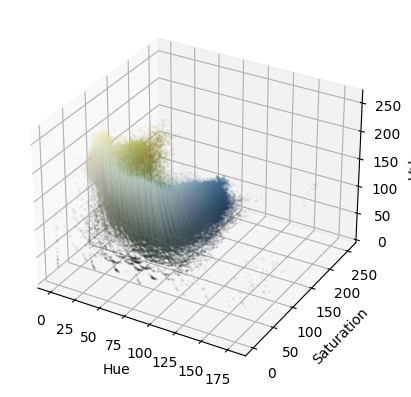

In [82]:
plot_hsv_distribution(img_path)

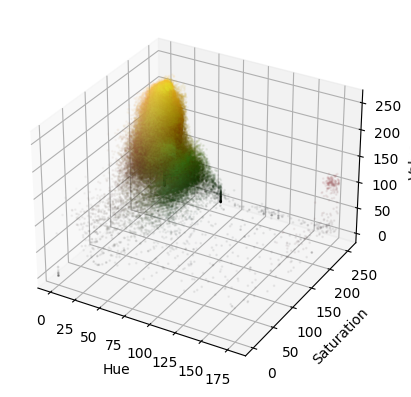

In [83]:
plot_hsv_distribution(img_path_2)

#### Comparing Distributions with quanized number.

##### Turning HSV into a 3D Normalized Distribution

In [24]:
from scipy.stats import multivariate_normal
import numpy as np

def multi_dist(img_path):
    # Load the image and convert it to HSV colorspace
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Reshape the 3D HSV array to a 2D array of shape (n_pixels, 3)
    h_flat = hsv[:,:,0].flatten()
    s_flat = hsv[:,:,1].flatten()
    v_flat = hsv[:,:,2].flatten()
    hsv = np.column_stack((h_flat, s_flat, v_flat))

    mean = np.mean(hsv, axis=0)
    cov = np.cov(hsv.T)

    return mean, cov

##### Mahalanobis distance - Difference between 3 dimenensional.

In [25]:
def calc_mahalanobis_dist(mean1, cov1, mean2, cov2):

    # Create two multivariate normal distribution objects
    dist1 = multivariate_normal(mean1, cov1)
    dist2 = multivariate_normal(mean2, cov2)

    # Calculate the Mahalanobis distance between the two means
    mahalanobis_dist = np.sqrt((mean1 - mean2) @ np.linalg.inv((cov1 + cov2) / 2) @ (mean1 - mean2))

    # Calculate the overlap between the two distributions using the PDF
    n_samples = 1000 # Randomly select sample from the distribution.
    samples1 = dist1.rvs(n_samples)
    samples2 = dist2.rvs(n_samples)
    overlap = np.mean(dist1.cdf(samples2) + dist2.cdf(samples1))

    return overlap * 100

In [26]:
def mahalanobis(img_path_1, img_path_2):
    """Calculates the Mahalanobis distance and overlap between two multivariate normal distributions.
    
    Args:
        mean1 (ndarray): Mean of the first distribution.
        cov1 (ndarray): Covariance matrix of the first distribution.
        mean2 (ndarray): Mean of the second distribution.
        cov2 (ndarray): Covariance matrix of the second distribution.
    
    Returns:
        float: Percentage of overlap between the two distributions using the probability density function (PDF).
    """
    mean1, cov1 = multi_dist(img_path_1)
    mean2, cov2 = multi_dist(img_path_2)

    # Create two multivariate normal distribution objects
    dist1 = multivariate_normal(mean1, cov1)
    dist2 = multivariate_normal(mean2, cov2)

    # Calculate the Mahalanobis distance between the two means
    mahalanobis_dist = np.sqrt((mean1 - mean2) @ np.linalg.inv((cov1 + cov2) / 2) @ (mean1 - mean2))

    # Calculate the overlap between the two distributions using the PDF
    n_samples = 1000 # Randomly select sample from the distribution.
    samples1 = dist1.rvs(n_samples)
    samples2 = dist2.rvs(n_samples)
    overlap = np.mean(dist1.cdf(samples2) + dist2.cdf(samples1))

    return overlap * 100

In [86]:
mahalanobis(img_path, img_path_2) # This represnet the percentage overlpa (similarity) between the two distributions.

0.6807521210141424

### Dynamic Range of Images
https://en.wikipedia.org/wiki/Dynamic_range

Statistical Measures for measuring dynamic range (Lighting) Distributions

In [27]:
import numpy as np
from scipy.stats import lognorm, expon, weibull_min, gamma, beta

# Log-Normal Distribution
def fit_lognormal(data):
    params = lognorm.fit(data)
    return params

# Exponential Distribution
def fit_exponential(data):
    params = expon.fit(data)
    return params

# Weibull Distribution
def fit_weibull(data):
    params = weibull_min.fit(data)
    return params

# Gamma Distribution
def fit_gamma(data):
    params = gamma.fit(data)
    return params

# Beta Distribution
def fit_beta(data):
    params = beta.fit(data)
    return params

# Skewness Calculation
def calculate_skewness(data):
    skewness = np.mean((data - np.mean(data)) ** 3) / np.power(np.var(data), 1.5)
    return skewness

In [88]:

def analyze_dynamic_range(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the minimum and maximum pixel intensities
    min_intensity = np.min(image)
    max_intensity = np.max(image)

    # Calculate the dynamic range
    dynamic_range = max_intensity - min_intensity

    # Calculate the histogram of pixel intensities
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = histogram.cumsum()

    # Normalize the CDF
    cdf_normalized = cdf * histogram.max() / cdf.max()

    # Visualize the histogram and CDF
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(image.flatten(), bins=256, range=[0, 256], color='b')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.plot(cdf_normalized, color='r')
    plt.title('CDF (Cumulative Distribution Function)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('CDF')

    plt.tight_layout()
    plt.show()

    data = np.array(image.flatten())
    # Fit distributions
    lognormal_params = fit_lognormal(data)
    exponential_params = fit_exponential(data)
    weibull_params = fit_weibull(data)
    gamma_params = fit_gamma(data)
    beta_params = fit_beta(data)

    # Calculate skewness
    skewness = calculate_skewness(data)

    print("Log-Normal Distribution Parameters:", lognormal_params)
    print("Exponential Distribution Parameters:", exponential_params)
    print("Weibull Distribution Parameters:", weibull_params)
    print("Gamma Distribution Parameters:", gamma_params)
    print("Beta Distribution Parameters:", beta_params)
    print("Skewness:", skewness)

    # Print the dynamic range
    print("Minimum Intensity:", min_intensity)
    print("Maximum Intensity:", max_intensity)
    print("Dynamic Range:", dynamic_range)
    print("Average Range:", np.mean(image.flatten()))
    print("Standard Deviation:", np.std(image.flatten()))




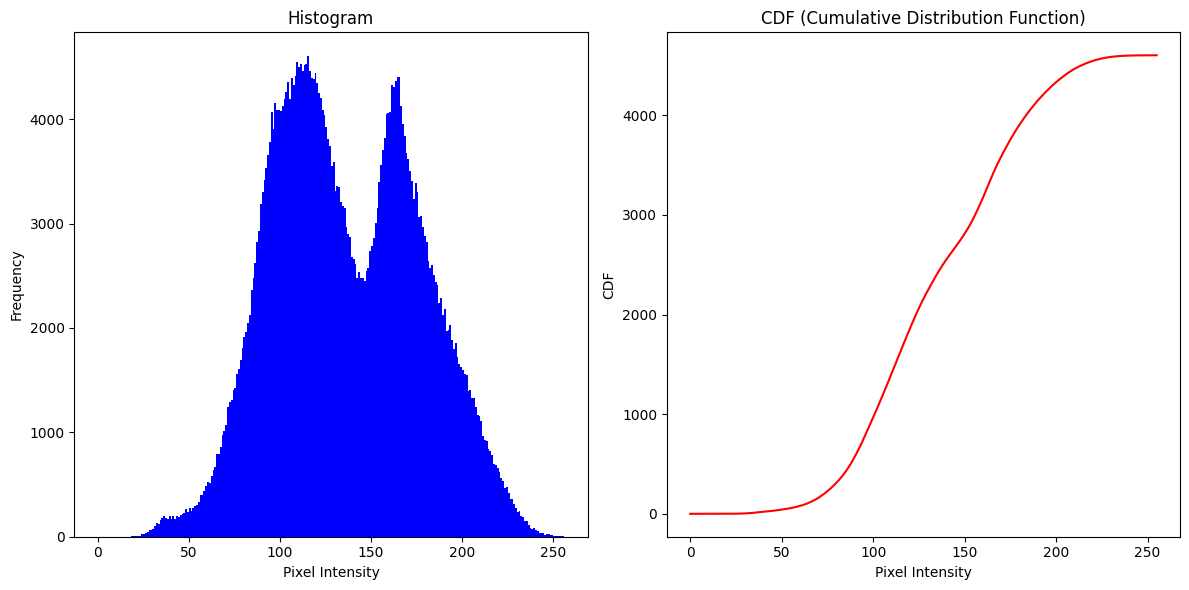

Log-Normal Distribution Parameters: (0.06663828862937338, -466.43891946653673, 601.1636389745313)
Exponential Distribution Parameters: (5.0, 131.060238371276)
Weibull Distribution Parameters: (0.21487910905051813, 4.999999999999999, 2.969862200626308)
Gamma Distribution Parameters: (124.64176470725226, -311.70641382932183, 3.5916231906011467)
Beta Distribution Parameters: (5.029277001625066, 5.2260815153045375, 4.9293088360142345, 267.64904167912573)
Skewness: 0.11878759061837126
Minimum Intensity: 5
Maximum Intensity: 255
Dynamic Range: 250
Average Range: 136.060238371276
Standard Deviation: 40.14076764051789


In [89]:
# Usage example
analyze_dynamic_range(img_path)

### Edge Detection
* Canny Edge detectin with different hysterisis thresholds
* Sobel Kernel
* Roberts Diagonal Kernel
* Laplacian of Gaussian kernel

In [28]:
def canny_edge_detection(image_path, threshold1, threshold2, gray_scale=False):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if gray_scale:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    edges = cv2.Canny(image, threshold1=threshold1, threshold2=threshold2, apertureSize=3, L2gradient=False)
    return edges

def sobel_operator(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    magnitude = np.uint8(magnitude)
    return magnitude

def laplacian_of_gaussian(image_path, kernel_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    return laplacian

def roberts_operator(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]], dtype=np.float32)
    kernel2 = np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]], dtype=np.float32)
    roberts1 = cv2.filter2D(gray, -1, kernel1)
    roberts2 = cv2.filter2D(gray, -1, kernel2)
    magnitude = np.sqrt(roberts1**2 + roberts2**2)
    magnitude = np.uint8(magnitude)
    return magnitude


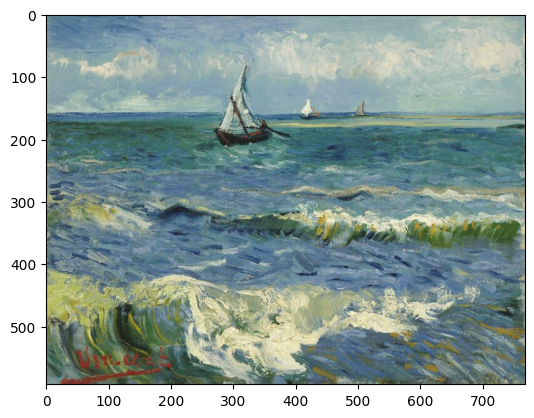

In [91]:
# Original Image For perspective
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

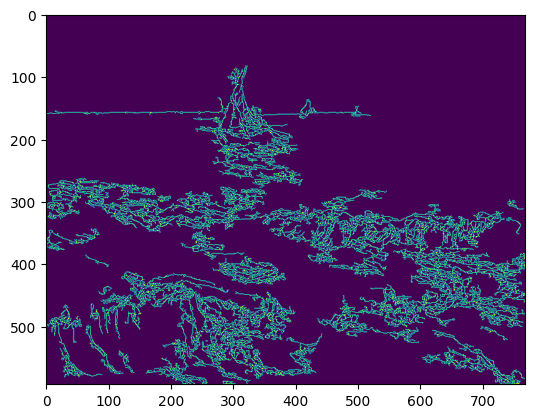

In [92]:
# Canny Edge Detection - Color
canny_sample = canny_edge_detection(img_path, 0, 500)
plt.imshow(canny_sample)
plt.show()

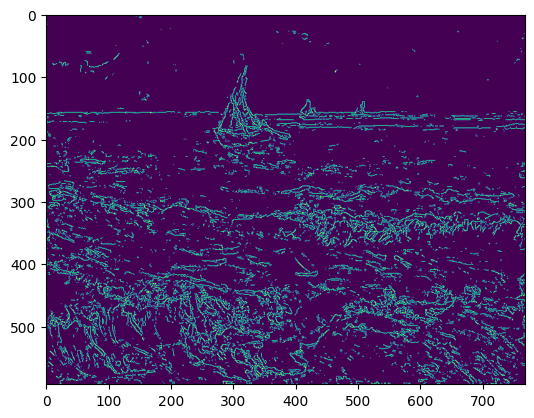

In [93]:
# Canny Edge Detection - Color
canny_sample = canny_edge_detection(img_path, 190, 200)
plt.imshow(canny_sample)
plt.show()

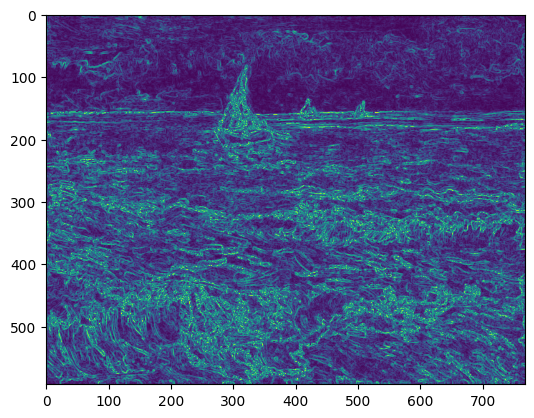

In [94]:
# Sobel Operator
mag_image = sobel_operator(img_path)
plt.imshow(mag_image)
plt.show()

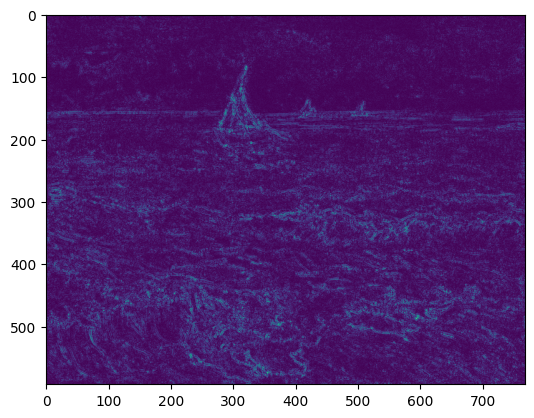

In [95]:
# Laplacian of Guassian
kern_size = 3
image = laplacian_of_gaussian(img_path, kern_size)
plt.imshow(image)
plt.show()

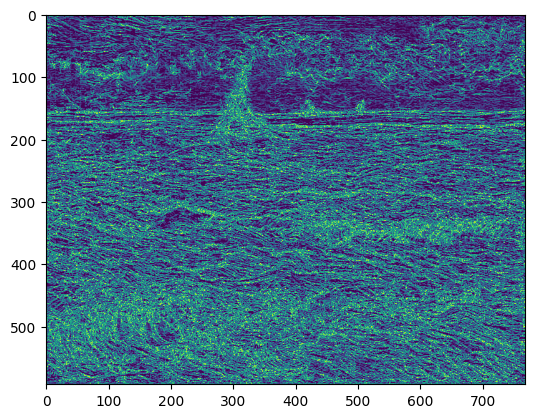

In [96]:
# Roberts operator
image = roberts_operator(img_path)
plt.imshow(image)
plt.show()

### Symmetrical & Geometric Analysis

In [29]:
import cv2
import numpy as np
from scipy.sparse import lil_matrix
from skimage.transform import radon
from scipy.sparse.csgraph import maximum_bipartite_matching

def hough_transform_canny1(image_path):
    edges = canny_edge_detection(img_path, 0, 500)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    
    return lines

def hough_transform_canny2(image_path):
    edges = canny_edge_detection(img_path, 190, 200)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    
    return lines

def hough_transform_lap(image_path):
    edges = laplacian_of_gaussian(image_path, 7)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    
    return lines



def radon_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sinogram = radon(image)
    
    return sinogram

def sift_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    
    return keypoints, descriptors

def fft_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    return magnitude_spectrum



def graph_symmetry_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape

    graph = lil_matrix((height * width, height * width), dtype=bool)

    # Connect neighboring pixels with edges
    for i in range(height):
        for j in range(width):
            pixel_index = i * width + j

            if i > 0:
                graph[pixel_index, (i - 1) * width + j] = True
            if i < height - 1:
                graph[pixel_index, (i + 1) * width + j] = True
            if j > 0:
                graph[pixel_index, i * width + (j - 1)] = True
            if j < width - 1:
                graph[pixel_index, i * width + (j + 1)] = True

    # Convert lil_matrix to coo_matrix
    graph_coo = graph.tocoo()

    # Find maximum bipartite matching to detect symmetry
    matching = maximum_bipartite_matching(graph_coo, perm_type='column')

    return matching

def apply_gabor_filter(image):

    ksize = (9, 9)  # Kernel size
    sigma = 5.0  # Standard deviation of the Gaussian envelope
    theta = np.pi/4  # Orientation of the normal to the parallel stripes of the Gabor function
    lmbda = 10.0  # Wavelength of the sinusoidal factor
    gamma = 1.0  # Spatial aspect ratio
    psi = 0  # Phase offset
    gabor_params = cv2.getGaborKernel(ksize, sigma, theta, lmbda, gamma, psi, ktype=cv2.CV_32F)

    # Check if the image has color channels
    if len(image.shape) < 3:
        raise ValueError("Input image must have color channels")

    # Split image into color channels
    b, g, r = cv2.split(image)

    # Apply Gabor filter to each color channel
    b_filtered = cv2.filter2D(b, cv2.CV_32F, gabor_params)
    g_filtered = cv2.filter2D(g, cv2.CV_32F, gabor_params)
    r_filtered = cv2.filter2D(r, cv2.CV_32F, gabor_params)

    # Merge filtered color channels
    gabor_filtered = cv2.merge((b_filtered, g_filtered, r_filtered))

    # Normalize the filtered image for visualization
    gabor_filtered = cv2.normalize(gabor_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return gabor_filtered

##### Hough Transform

In [98]:
# Hough Transform
line_image = hough_transform(img_path)

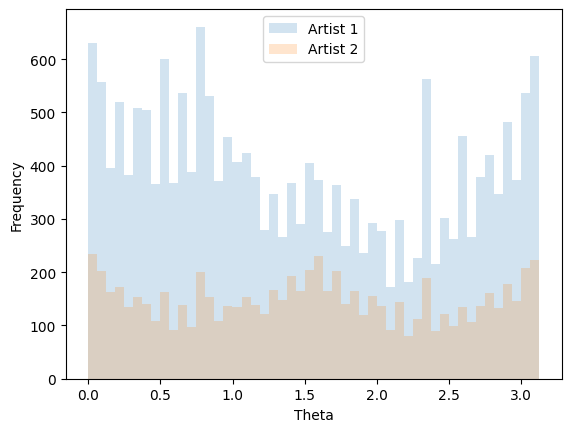

In [99]:
# Brush Stroke Analysis
# Compare brush strokes between two artists
image_path_artist1 = "path/to/artist1_image.png"
image_path_artist2 = "path/to/artist2_image.png"

lines_artist1 = hough_transform_lap(img_path)
lines_artist2 = hough_transform_lap(random_img_path)
lines_artist3 = hough_transform_lap(img_path_2)

# Extract theta values from the lines
thetas_artist1 = [line[0][1] for line in lines_artist1]
thetas_artist2 = [line[0][1] for line in lines_artist2]
thetas_artist3 = [line[0][1] for line in lines_artist3]

# Plot histograms of theta distributions
plt.hist(thetas_artist1, bins=50, alpha=0.2, label='Artist 1')
plt.hist(thetas_artist2, bins=50, alpha=0.2, label='Artist 2')

plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.legend()
plt.show()

This shows a bit of a clean distribution between the two and some clear differences. I think it might be worth keping these distributions in the model if we can fit them in.

##### Radon Transform

In [100]:
# # Radon Transform
sino = radon_transform(img_path)
print(sino)

c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


[[298.17254902 154.74401005 151.86742801 ... 135.79301374 141.24919803
  150.46353213]
 [300.25882353 179.57774979 165.53150422 ... 147.57879506 156.93170768
  174.65642105]
 [300.59215686 205.79316284 177.26648082 ... 156.22393063 169.83993497
  203.40826385]
 ...
 [319.1254902  250.54312167 215.24041606 ... 178.26081345 193.78997472
  229.57650731]
 [317.94901961 223.11464675 205.11645613 ... 165.80921979 178.86981989
  201.01457466]
 [319.28627451 198.31333266 188.30224515 ... 156.47379177 160.97775923
  170.29786893]]


##### Sift Transform

In [101]:
# Sift Transform
sift_transform(img_path)[1]

array([[ 3.,  3.,  4., ...,  0.,  0.,  0.],
       [ 1.,  3.,  2., ...,  0.,  0.,  1.],
       [ 6.,  6.,  4., ..., 26.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 18.,  4.,  0.],
       [25., 29., 15., ...,  0.,  0.,  0.],
       [ 2., 39., 28., ...,  0.,  0.,  0.]], dtype=float32)

In [102]:
fft_transform(img_path)

array([[168.58464292, 158.25220381, 162.26778739, ..., 153.53573483,
        152.31283594, 159.78593231],
       [156.91488866, 154.44752154, 159.90095226, ..., 146.02694368,
        153.87773172, 132.4833198 ],
       [151.25463939, 139.1579023 , 125.91552313, ..., 152.29637885,
        157.31341356, 124.99377948],
       ...,
       [151.25463939, 124.99377948, 157.31341356, ..., 149.20066042,
        125.91552313, 139.1579023 ],
       [156.91488866, 132.4833198 , 153.87773172, ..., 144.83746076,
        159.90095226, 154.44752154],
       [168.58464292, 159.78593231, 152.31283594, ..., 141.80757316,
        162.26778739, 158.25220381]])

In [103]:
graph_symmetry_detection(img_path)

array([     1,      0,      3, ..., 455420, 455423, 455422])

# 3.Creating Metric Distributions for each artist
1. HSV v. RGB Comparisons
2. Edge Filter Comparisons
3. Garbor Filters

## HSV & RGB Distribution for each Artist.

In [13]:
def rgbImageFlat(img_path):
    # Load the image and convert it to HSV colorspace
    img = cv2.imread(img_path)
    
        
    # Reshape the 3D HSV array to a 2D array of shape (n_pixels, 3)
    r_flat = img[:,:,0].flatten()
    g_flat = img[:,:,1].flatten()
    b_flat = img[:,:,2].flatten()

    return r_flat, g_flat, b_flat

In [14]:
artists_3D_params_rgb = dict()

# Setting Initial Params
cur_artist_name = "Albrecht"
artist_r_flat = np.empty((0,), dtype=np.float32).flatten()
artist_b_flat = np.empty((0,), dtype=np.float32).flatten()
artist_g_flat = np.empty((0,), dtype=np.float32).flatten()


for pic_dict in artists:
    if cur_artist_name != pic_dict['artist-name']:
        rgb = np.column_stack((artist_r_flat, artist_b_flat, artist_g_flat))
        mean = np.mean(rgb, axis = 0)
        cov = np.cov(rgb.T)
        artists_3D_params_rgb[cur_artist_name] = {"mean":mean, "Cov": cov}

        # Setting Params
        cur_artist_name = pic_dict['artist-name']
        artist_r_flat = np.empty((0,), dtype=np.float32).flatten()
        artist_b_flat = np.empty((0,), dtype=np.float32).flatten()
        artist_g_flat = np.empty((0,), dtype=np.float32).flatten()
        
    # Iteration 
    cur_image_path = os.getcwd() + "\\" + pic_dict['pic-file-name']
    cur_h_flat, cur_s_flat, cur_v_flat = rgbImageFlat(cur_image_path)
    
    artist_r_flat = np.append(artist_r_flat, cur_h_flat)
    artist_b_flat = np.append(artist_b_flat, cur_s_flat)
    artist_g_flat = np.append(artist_g_flat, cur_v_flat)

In [15]:
import pickle
with open('rgb.pkl', 'wb') as handle:
    pickle.dump(artists_3D_params_rgb, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
def hsvImageFlat(img_path):
    # Load the image and convert it to HSV colorspace
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
        
    # Reshape the 3D HSV array to a 2D array of shape (n_pixels, 3)
    h_flat = hsv[:,:,0].flatten()
    s_flat = hsv[:,:,1].flatten()
    v_flat = hsv[:,:,2].flatten()

    return h_flat, s_flat, v_flat

In [ ]:
artists_3D_params = dict()

# Setting Initial Params
cur_artist_name = "Albrecht"
artist_h_flat = np.empty((0,), dtype=np.float32).flatten()
artist_s_flat = np.empty((0,), dtype=np.float32).flatten()
artist_v_flat = np.empty((0,), dtype=np.float32).flatten()


for pic_dict in artists:
    
    if cur_artist_name != pic_dict['artist-name']:
        hsv = np.column_stack((artist_h_flat, artist_s_flat, artist_v_flat))
        mean = np.mean(hsv, axis = 0)
        cov = np.cov(hsv.T)
        artists_3D_params[cur_artist_name] = {"mean":mean, "Cov": cov}

        # Setting Params
        cur_artist_name = pic_dict['artist-name']
        artist_h_flat = np.empty((0,), dtype=np.float32).flatten()
        artist_s_flat = np.empty((0,), dtype=np.float32).flatten()
        artist_v_flat = np.empty((0,), dtype=np.float32).flatten()
        
    # Iteration 
    cur_image_path = os.getcwd() + "\\" + pic_dict['pic-file-name']
    cur_h_flat, cur_s_flat, cur_v_flat = hsvImageFlat(cur_image_path)
    
    artist_h_flat = np.append(artist_h_flat, cur_h_flat)
    artist_s_flat = np.append(artist_s_flat, cur_s_flat)
    artist_v_flat = np.append(artist_v_flat, cur_v_flat)

In [18]:
import pickle
with open('hsv.pkl', 'wb') as handle:
    pickle.dump(artists_3D_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Edge & Garbor Filter's - Linear Hough - Theta Distribution for each Artist.

In [19]:
def get_thetas(img_path):
    
    lines_lap = hough_transform_lap(img_path)
    lines_can1 = hough_transform_canny1(img_path)
    lines_can2 = hough_transform_canny2(img_path)

    thetas_lap = [line[0][1] for line in lines_lap]
    thetas_can1 = [line[0][1] for line in lines_can1]
    thetas_can2 = [line[0][1] for line in lines_can2]

    return thetas_lap, thetas_can1, thetas_can2

In [20]:
def get_theta_garbor(img_path):
    image = cv2.imread(img_path)
    garbor_filter = apply_gabor_filter(image)
    img = cv2.cvtColor(garbor_filter, cv2.COLOR_RGB2GRAY)
    lines = cv2.HoughLines(img, 1, np.pi/180, 200)

    thetas = [line[0][1] for line in lines]

    return thetas

In [46]:
import random
artists_edge_thetas = dict()

# Setting Initial Params
cur_artist_name = "Albrecht"
cur_theta_lap = []
cur_thetas_can1 = []
cur_thetas_can2 = []
cur_garbor_thetas = []

for pic_dict in artists:
    if cur_artist_name != pic_dict['artist-name']:

        
        # Obtaining Random Samples from the lists for efficiency.
        try: 
            cur_garbor_thetas= random.sample(cur_garbor_thetas, 1000) 
            cur_theta_lap = random.sample(cur_theta_lap, 1000)
            cur_thetas_can1 = random.sample(cur_thetas_can1, 1000)
            cur_thetas_can2 = random.sample(cur_thetas_can2, 1000)
        except:
            pass

        

        artists_edge_thetas[cur_artist_name] = {"Laplacian":cur_theta_lap, 
                                                "Canny 1": cur_thetas_can1, 
                                                "Canny 2": cur_thetas_can2,
                                                "Garbor": cur_garbor_thetas}

        # Setting Params
        cur_artist_name = pic_dict['artist-name']
        cur_theta_lap = []
        cur_thetas_can1 = []
        cur_thetas_can2 = []
        cur_garbor_thetas = []
    
    # Iteration 
    cur_image_path = os.getcwd() + "\\" + pic_dict['pic-file-name']


    thetas_lap, thetas_can1, thetas_can2 = get_thetas(cur_image_path)
    garbor_theta = get_theta_garbor(cur_image_path)

    cur_garbor_thetas += garbor_theta
    cur_theta_lap += thetas_lap
    cur_thetas_can1 += thetas_can1
    cur_thetas_can2 += thetas_can2

In [47]:
import pickle
with open('thetas.pkl', 'wb') as handle:
    pickle.dump(artists_edge_thetas, handle, protocol=pickle.HIGHEST_PROTOCOL)

# 4. Comparing Metric Distributions between artists.

## HSV & RGB

### Similarity with artist-to-artist with HSV Distributions.

##### Calculating Similarities

In [41]:
overlaps = dict()
combos = set([])

for key1, value1 in artists_3D_params.items():
    mean1 = artists_3D_params[key1]["mean"]
    cov1 = artists_3D_params[key1]["Cov"]

    cur_overlap = dict()
    for key2, value2 in artists_3D_params.items():
        if (key1, key2) in combos:
            continue
        else:
            combos.add((key1, key2))

        mean2 = artists_3D_params[key2]["mean"]
        cov2 = artists_3D_params[key2]["Cov"]

        overlap_pct = calc_mahalanobis_dist(mean1, cov1, mean2, cov2)
        
        cur_overlap[key2] = overlap_pct
        

    overlaps[key1] = cur_overlap

In [42]:
import pickle
with open('overlaps-hsv.pkl', 'wb') as handle:
    pickle.dump(overlaps, handle, protocol=pickle.HIGHEST_PROTOCOL)

##### Displaying Confusion Matrix

In [53]:
with open('overlaps-hsv.pkl', 'rb') as handle:
    overlaps_hsv = pickle.load(handle)

In [54]:
overlaps_hsv

{'Albrecht': {'Albrecht': 27.496040928817727,
  'Alfred_Sisley': 25.136393241702205,
  'Amedeo_Modigliani': 59.90836467561228,
  'Andrei_Rublev': 64.42137720439688,
  'Andy_Warhol': 65.2754027831251,
  'Camille_Pissarro': 68.1895722342126,
  'Caravaggio': 41.58284697878443,
  'Claude_Monet': 58.54459890103062,
  'Diego_Rivera': 63.26177540197933,
  'Diego_Velazquez': 57.20305879262325,
  'Edgar_Degas': 16.567768600615366,
  'Edouard_Manet': 56.51685594401101,
  'Edvard_Munch': 65.99810282951938,
  'El_Greco': 54.12109739377563,
  'Eugene_Delacroix': 57.02323081239577,
  'Francisco_Goya': 27.332246360697425,
  'Frida_Kahlo': 62.20395701529178,
  'Georges_Seurat': 72.38786130951408,
  'Giotto_di_Bondone': 56.23415702625327,
  'Gustave_Courbet': 57.33183777954508,
  'Gustav_Klimt': 37.29206019256214,
  'Henri_de_Toulouse-Lautrec': 68.06765505872619,
  'Henri_Matisse': 69.05071859543102,
  'Henri_Rousseau': 68.63935946444595,
  'Hieronymus_Bosch': 53.027833235631704,
  'Jackson_Pollock': 6

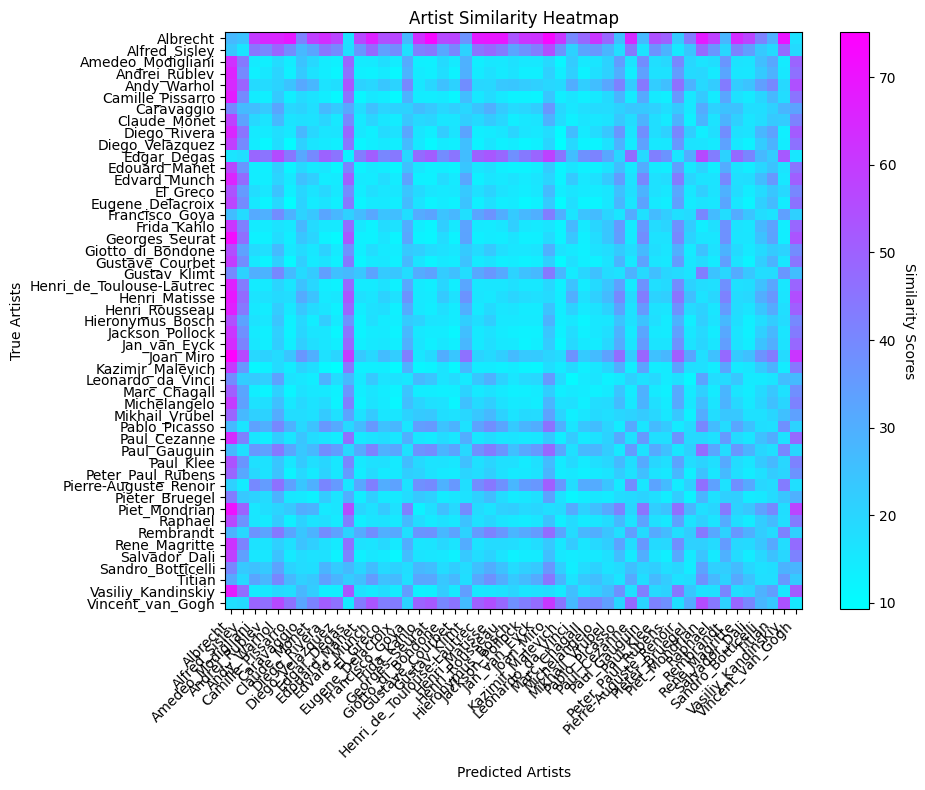

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the artists and similarity scores from the dictionary
artists = list(overlaps_hsv.keys())
similarity_scores = np.array([list(values.values()) for values in overlaps_hsv.values()])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
im = ax.imshow(similarity_scores, cmap='cool')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Similarity Scores', rotation=-90, va='bottom')

# Set the tick labels and title
ax.set_xticks(np.arange(len(artists)))
ax.set_yticks(np.arange(len(artists)))
ax.set_xticklabels(artists, rotation=45, ha='right')
ax.set_yticklabels(artists)
plt.xlabel('Predicted Artists')
plt.ylabel('True Artists')
plt.title('Artist Similarity Heatmap')

# Display the plot
plt.tight_layout()
plt.show()


### Similarity with artist-to-artist with RGB Distributions.

##### Calculating Similarities

In [43]:
overlaps = dict()
combos = set([])

for key1, value1 in artists_3D_params_rgb.items():

    cur_overlap = dict()
    for key2, value2 in artists_3D_params_rgb.items():
        if (key1, key2) in combos:
            
            continue
        else:
            combos.add((key1, key2))


        mean1 = artists_3D_params_rgb[key1]["mean"]
        cov1 = artists_3D_params_rgb[key1]["Cov"]

        mean2 = artists_3D_params_rgb[key2]["mean"]
        cov2 = artists_3D_params_rgb[key2]["Cov"]

        overlap_pct = calc_mahalanobis_dist(mean1, cov1, mean2, cov2)
        
        cur_overlap[key2] = overlap_pct
        

    overlaps[key1] = cur_overlap

In [44]:
import pickle
with open('overlaps-rgb.pkl', 'wb') as handle:
    pickle.dump(overlaps, handle, protocol=pickle.HIGHEST_PROTOCOL)

##### Displaying Confusion Matrix

In [55]:
with open('overlaps-rgb.pkl', 'rb') as handle:
    overlaps_rgb = pickle.load(handle)

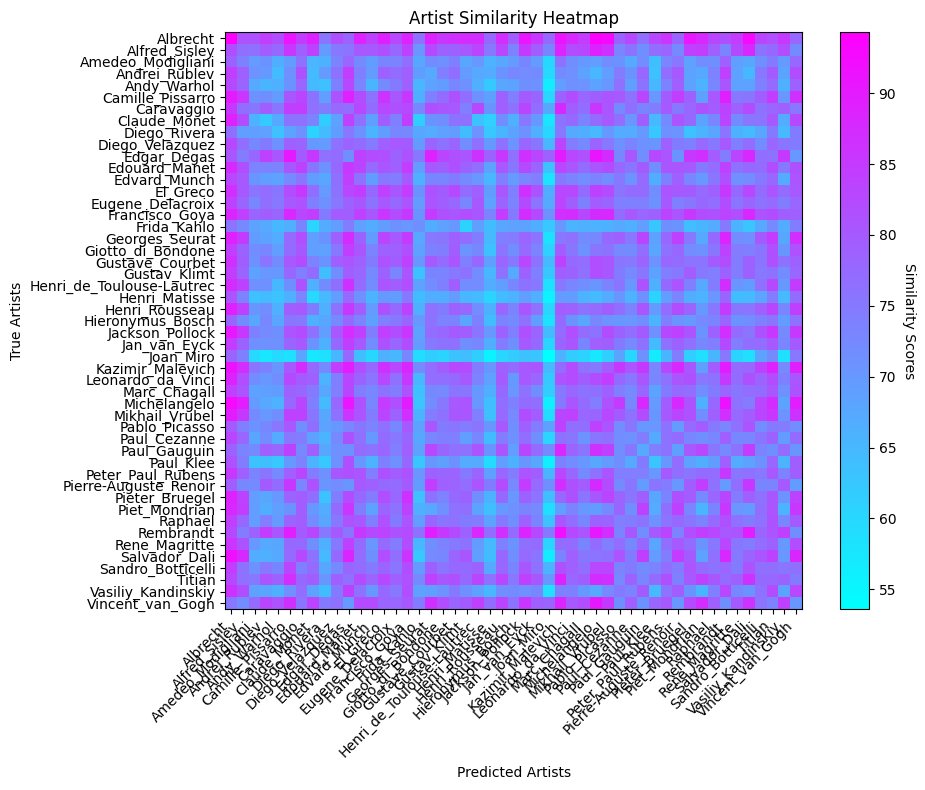

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the artists and similarity scores from the dictionary
artists = list(overlaps_rgb.keys())
similarity_scores = np.array([list(values.values()) for values in overlaps_rgb.values()])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
im = ax.imshow(similarity_scores, cmap='cool')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Similarity Scores', rotation=-90, va='bottom')

# Set the tick labels and title
ax.set_xticks(np.arange(len(artists)))
ax.set_yticks(np.arange(len(artists)))
ax.set_xticklabels(artists, rotation=45, ha='right')
ax.set_yticklabels(artists)
plt.xlabel('Predicted Artists')
plt.ylabel('True Artists')
plt.title('Artist Similarity Heatmap')

# Display the plot
plt.tight_layout()
plt.show()


## Similarity with Artist-to-Artist in terms of theta distribution for differing edge filters.

I will perform all edgte filters at the same time.

In [48]:
def calculate_percentage_overlap(hist1, hist2):
    intersection = sum(min(count1, count2) for count1, count2 in zip(hist1, hist2))
    union = sum(hist1) + sum(hist2) - intersection
    percentage_overlap = (intersection / union) * 100
    return percentage_overlap

In [49]:
overlaps = dict()
combos = set([])

for key1, value1 in artists_edge_thetas.items():

    cur_overlap = dict()
    laplace_1 = value1["Laplacian"]
    canny_1_1 = value1["Canny 1"]
    canny_2_1 = value1["Canny 2"]
    garbor_1 = value1["Garbor"]

    for key2, value2 in artists_edge_thetas.items():
        if (key1, key2) in combos:
            
            continue
        else:
            combos.add((key1, key2))

        laplace_2 = value2["Laplacian"]
        canny_1_2 = value2["Canny 1"]
        canny_2_2 = value2["Canny 2"]
        garbor_2 = value2["Garbor"]
        

        garbor_overlap_pct = calculate_percentage_overlap(garbor_1, garbor_2)
        laplace_overlap_pct = calculate_percentage_overlap(laplace_1, laplace_2)
        canny_1_overlap_pct = calculate_percentage_overlap(canny_1_1, canny_1_2)
        canny_2_overlap_pct = calculate_percentage_overlap(canny_2_1, canny_2_2)

        
        cur_overlap[key2] = {"Laplacian":laplace_overlap_pct, 
                             "Canny 1": canny_1_overlap_pct, 
                             "Canny 2": canny_2_overlap_pct,
                             "Garbor": garbor_overlap_pct}
        

    overlaps[key1] = cur_overlap

In [50]:
import pickle
with open('overlap-thetas.pkl', 'wb') as handle:
    pickle.dump(overlaps, handle, protocol=pickle.HIGHEST_PROTOCOL)

##### Visualization

In [58]:
with open('overlap-thetas.pkl', 'rb') as handle:
    overlaps_thetas = pickle.load(handle)

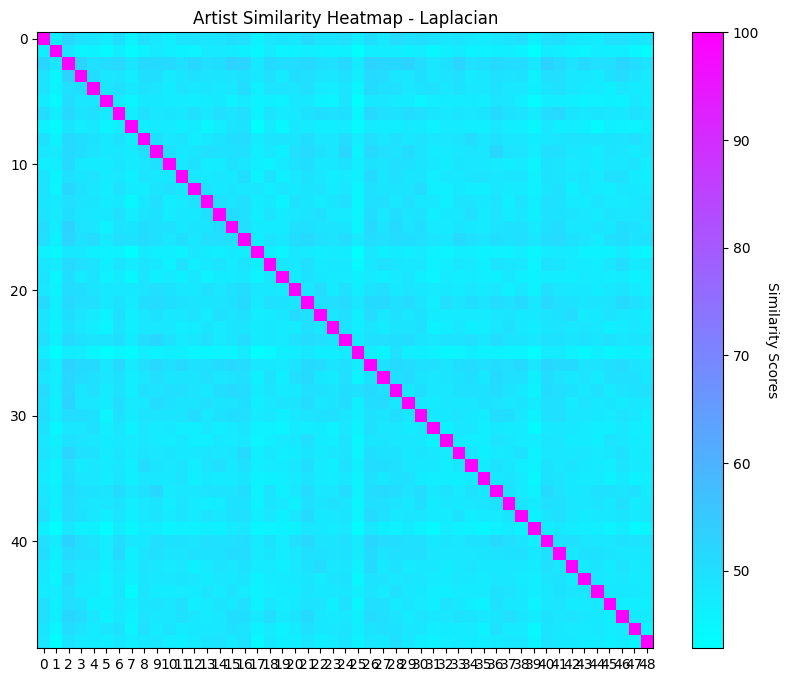

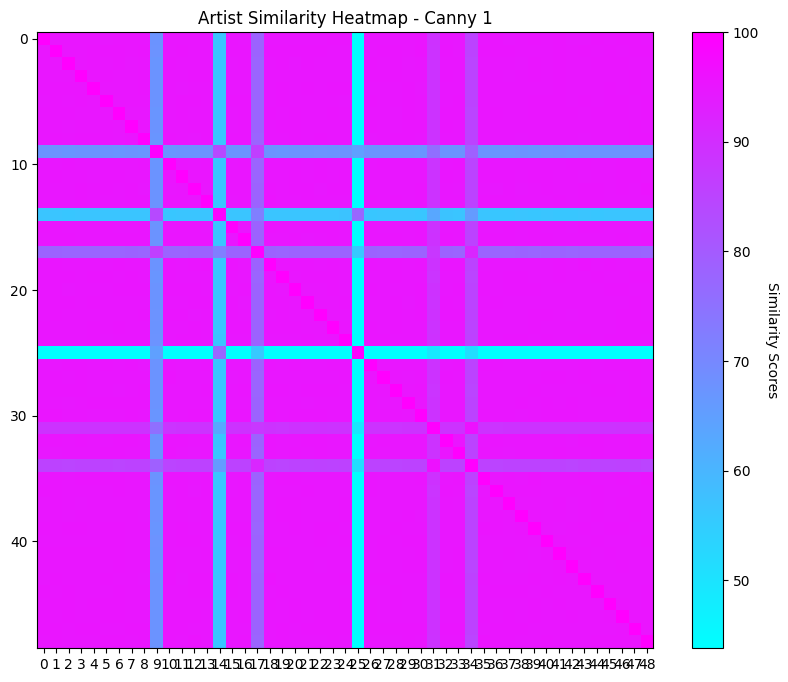

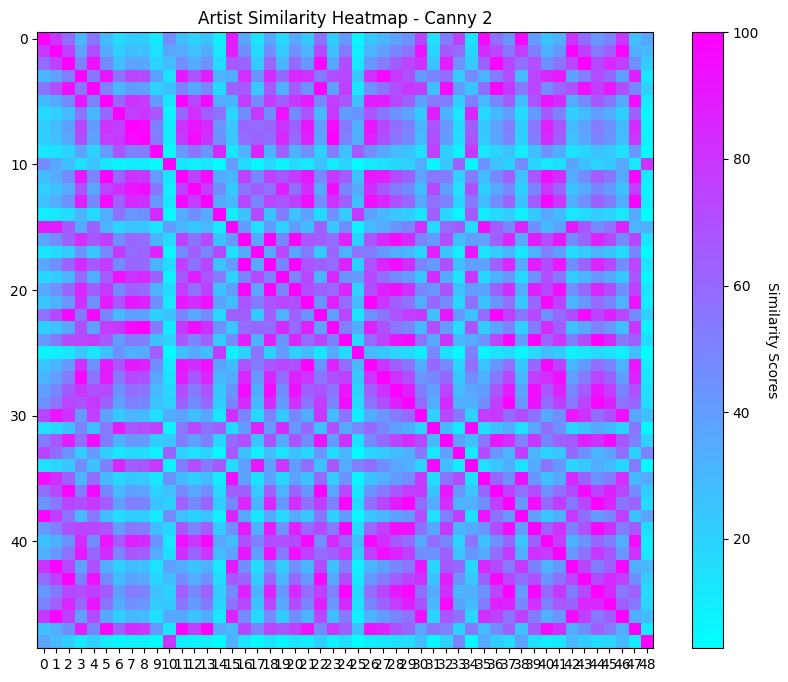

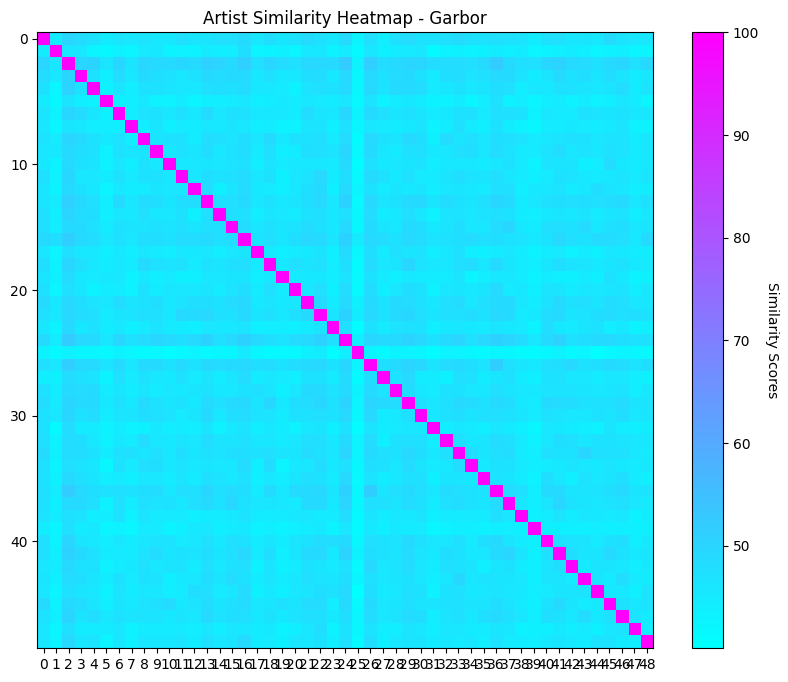

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the artists and similarity scores for each sub-dictionary
artists = list(overlaps_thetas.keys())
sub_dict_names = list(overlaps_thetas[artists[0]][artists[0]].keys())

# Create a separate heatmap for each sub-dictionary
for sub_dict_name in sub_dict_names:
    similarity_scores = np.array([[overlaps_thetas[artist][target][sub_dict_name] for target in artists] for artist in artists])

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create the heatmap
    im = ax.imshow(similarity_scores, cmap='cool')

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Similarity Scores', rotation=-90, va='bottom')
    ax.set_title(f'Artist Similarity Heatmap - {sub_dict_name}')

    # Set the tick labels and title
    ax.set_xticks(np.arange(len(artists)))


Laplacian & Garbor had displayed clear distinctions in theta(brush stroke angle) distributions.

# Applicable Filters
1. Edge Filter 
2. High Dynamic Range Filter
4. HSV or RGB better for differentiation. (Which color space is a better input.)
4. Gabor Filter (Brush and Edge Detection)

# Augmentation Processes
1. Guassian Blurring
2. Rotations
3. Flipping.
4. Symmetrical Filtering